# Imports

In [1]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read Data

In [2]:
# file paths
data_file = "heart.csv"

In [3]:
# read data 
data = pd.read_csv(f"{data_file}")

# Data Description

In [4]:
# show columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# show statistical information
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Preprocessing

In [8]:
def check_nulls(data):
    # check null data
    columns = data.columns
    null_values_in_columns = []
    total_null_data = 0

    for column in columns:
        null_data_number_in_column = data[column].isnull().values.sum()
        null_values_in_columns.append(null_data_number_in_column)
        total_null_data += null_data_number_in_column
    return null_values_in_columns

def check_duplicates(data):
    # check duplicate data
    return data.duplicated().sum()

def check_data_values(data):
    nulls = check_nulls(data)
    dups = check_duplicates(data)
    
    return pd.DataFrame({"Column": data.columns,
              "Null value": nulls,
              "Duplicated rows": ([dups] * len(data.columns))})

In [9]:
# show missing and duplicate values
check_data_values(data)

,Column,Null value,Duplicated rows
0,age,0,1
1,sex,0,1
2,cp,0,1
3,trestbps,0,1
4,chol,0,1
5,fbs,0,1
6,restecg,0,1
7,thalach,0,1
8,exang,0,1
9,oldpeak,0,1


In [10]:
# eliminate duplicate row
data = data.drop_duplicates() 

# Feature Selection

In [11]:
X = data.iloc[:,0:-1]  # features
y = data.iloc[:,-1]    # target

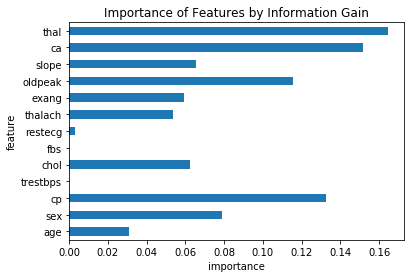

In [12]:
importances = mutual_info_classif(X, y)

feature_importances = pd.Series(importances, data.columns[0:-1])
axes = feature_importances.plot(kind='barh', title='Importance of Features by Information Gain')

axes.set_xlabel("importance")
axes.set_ylabel("feature")

plt.show()

In [13]:
# get 8 most relevant features
most_important_features = feature_importances.nlargest(n=8).index.tolist()
most_important_features

['thal', 'ca', 'cp', 'oldpeak', 'sex', 'slope', 'chol', 'exang']

In [14]:
# update X by selecting the relevant features
X = X[most_important_features]

In [15]:
X.head()

,thal,ca,cp,oldpeak,sex,slope,chol,exang
0,1,0,3,2.3,1,0,233,0
1,2,0,2,3.5,1,0,250,0
2,2,0,1,1.4,0,2,204,0
3,2,0,1,0.8,1,2,236,0
4,2,0,0,0.6,0,2,354,1


# Split Data

In [16]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# show shapes of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 8), (61, 8), (241,), (61,))

In [18]:
train_data = (X_train, y_train)
test_data = (X_test, y_test)

# Classify

In [19]:
def classify(classifier, train_data, test_data):
    X_train, y_train = train_data
    X_test, y_test = test_data
    
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy >> ", acc_score) 
    
    y_pred_proba = classifier.predict_proba(X_test)
    print('AUC >> ' + str(roc_auc_score(y_test, y_pred_proba[:,1])))
    
    plot_confusion_matrix(classifier, X_test, y_test, 
                          cmap=plt.cm.Blues,)  
    plt.show()  
    
    return (y_pred, y_pred_proba, acc_score*100)

In [20]:
all_accuracy_scores = {"decision_tree": None, "random_forest": None}

## Decision Tree

Accuracy >>  0.7704918032786885
AUC >> 0.7653846153846156


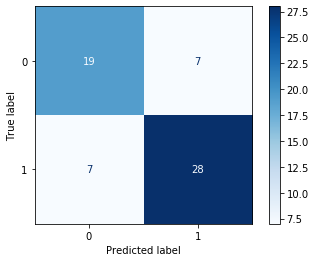

In [21]:
classifier = DecisionTreeClassifier(criterion = 'gini')
prediction = classify(classifier, train_data, test_data)
all_accuracy_scores["decision_tree"] = prediction[2]

## Random Forests

Accuracy >>  0.8852459016393442
AUC >> 0.9406593406593406


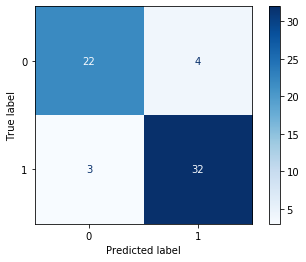

In [22]:
classifier = RandomForestClassifier(criterion='gini',  n_estimators= 400, random_state=0)
prediction = classify(classifier, train_data, test_data)
all_accuracy_scores["random_forest"] = prediction[2]

# Results
## Display Accuracy Scores of Two Classifiers

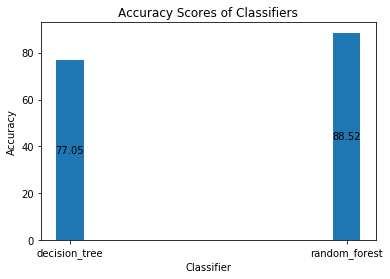

In [23]:
ax = plt.bar(list(all_accuracy_scores.keys()), list(all_accuracy_scores.values()), width = 0.1)
 
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores of Classifiers")

# Add annotation to bars
for bar in ax.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), 
                 ha='center', va='center')
    
plt.show()

In [24]:
accuracy_increase = all_accuracy_scores["random_forest"] - all_accuracy_scores["decision_tree"] 
accuracy_improvement = accuracy_increase / all_accuracy_scores["decision_tree"] * 100
accuracy_improvement

14.893617021276587